In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import string

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

In [2]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"

In [3]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

In [4]:
train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

In [5]:
train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

In [6]:
poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

In [7]:
train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

In [8]:
train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

In [ ]:
m_totales_train = pd.read_csv(f"{ruta_data}/features/metros_totales_train_lgbm.csv")
m_totales_test = pd.read_csv(f"{ruta_data}/features/metros_totales_test_lgbm.csv")

In [ ]:
m_cubiertos_train = pd.read_csv(f"{ruta_data}/features/metros_cubiertos_train_lgbm.csv")
m_cubiertos_test = pd.read_csv(f"{ruta_data}/features/metros_cubiertos_test_lgbm.csv")

In [ ]:
train_limpio["metrostotales"] = m_totales_train
test_limpio["metrostotales"] = m_totales_test

In [ ]:
train_limpio["metroscubiertos"] = m_cubiertos_train
test_limpio["metroscubiertos"] = m_cubiertos_test

In [9]:
id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

In [10]:
train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [ ]:
cant_palabras_train = pd.read_csv(f"{ruta_data}/features/ftr_cant_palabras_train.csv")
cant_palabras_test = pd.read_csv(f"{ruta_data}/features/ftr_cant_palabras_test.csv")

In [ ]:
train_limpio["cant_pal"] = cant_palabras_train
test_limpio["cant_pal"] = cant_palabras_test

---

In [ ]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [ ]:
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 200,
"learning_rate": 0.03,
"num_iterations": 4000,
"feature_fraction":0.6
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

In [ ]:
mean_absolute_error(y_test, pred)

In [ ]:
ver_dispersion(y_test, pred)

In [11]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_300d.csv")

In [28]:
desc_test = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_test_200d.csv")

In [12]:
desc_train = reduce_mem_usage(desc_train)

In [29]:
desc_test = reduce_mem_usage(desc_test)

In [13]:
train_limpio = pd.concat([train_limpio, desc_train], axis=1)

In [30]:
test_limpio = pd.concat([test_limpio, desc_test], axis=1)

In [14]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [19]:
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 200,
"learning_rate": 0.03,
"num_iterations": 4000,
"feature_fraction":0.6
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [20]:
mean_absolute_error(y_test, pred)

523997.5276544791

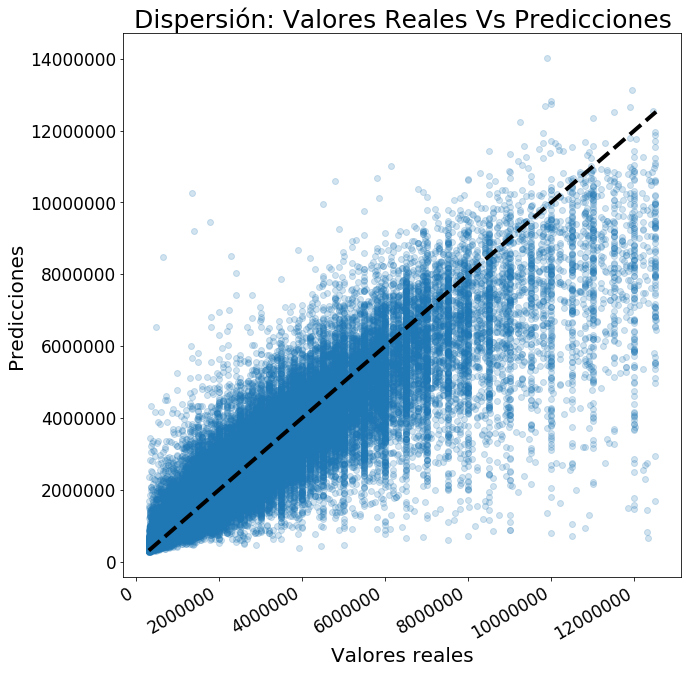

In [18]:
ver_dispersion(y_test, pred)

In [21]:
y_l = np.log(y)
d_train = lgb.Dataset(X, label= y_l)
param = {
'num_leaves': 200,
"learning_rate": 0.03,
"num_iterations": 4000,
"feature_fraction":0.6
}
reg = lgb.train(param, d_train)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [32]:
pred_test = reg.predict(test_limpio)
pred_test = np.exp(pred_test)

In [33]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

In [34]:
ids_test["target"] = pred_test

In [35]:
ids_test.to_csv(f"{ruta_submits}/limpieza_descripciones_retuneo_LGBM_300d.csv",index=False)